In [1]:
import pandas as pd
import numpy as np  
import spacy
import re
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:
df = pd.read_csv("binaryclass.csv", index_col=0)
df.head(5)
df.reset_index(inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Veracity       320 non-null    int64 
 1   Transcription  320 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


,Veracity,Transcription
0,1,My best friend is a really nice person. Um. Sh...
1,0,She’s actually really two faced and not fun to...
2,1,So this specific person is actually just a rea...
3,0,This person is actually a really kind person. ...
4,1,My roommate is a really good person. She’s ver...


In [3]:
def remove_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def normalized(text):
    text = text.lower()
    text = re.sub(r'[\r|\n|\r\n]+', ' ', text)
    text = remove_accented_characters(text)
    return text

df["normalization"] = df.Transcription.apply(lambda x : normalized(x)) 
                                                                 

In [4]:
# Define the feature extraction parameters (N-grams and feature selection)
ngram_range = (1, 2)  # Include unigrams and bigrams
percentile = 70  # Percentage of features to keep after Chi-square feature selection


In [7]:
vectorizer = CountVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(df['normalization'])

In [8]:
from sklearn.feature_selection import SelectPercentile, chi2
y = df['Veracity']
selector = SelectPercentile(chi2, percentile=percentile)
X_selected = selector.fit_transform(X, y)

In [9]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear') 


svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [11]:

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.828125
Confusion Matrix:
[[25  6]
 [ 5 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.82      0.85      0.84        33

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64



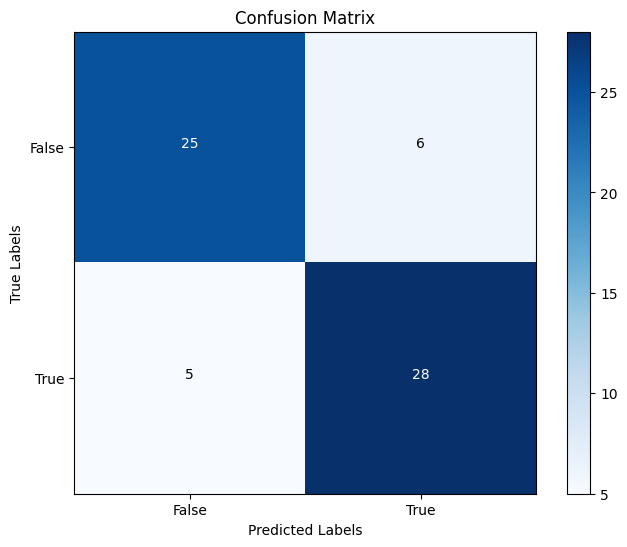

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svm_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.grid(False)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()


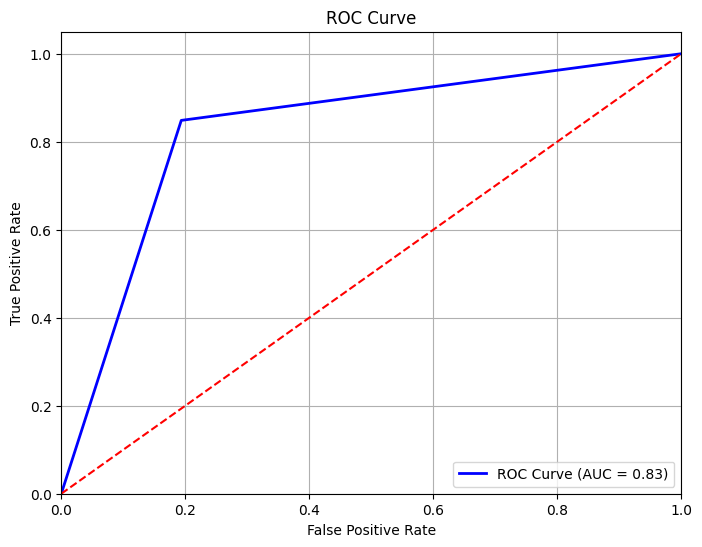

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, svm_predictions)

roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
